In [45]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import numpy as np
import geoplot
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

/kaggle/input/dataset-bursa-mahalle/mahalle_nufus.csv
/kaggle/input/dataset-bursa-mahalle/Mahalle_Sinirlari.csv
/kaggle/input/dataset-bursa-mahalle/bursa-mahalle.json
/kaggle/input/bursa-mahalle-sinirlari/bursa-mahalle-shape.cpg
/kaggle/input/bursa-mahalle-sinirlari/bursa-mahalle-shape.prj
/kaggle/input/bursa-mahalle-sinirlari/bursa-mahalle-shape.shx
/kaggle/input/bursa-mahalle-sinirlari/bursa-mahalle-shape.shp
/kaggle/input/bursa-mahalle-sinirlari/bursa-mahalle-shape.qmd
/kaggle/input/bursa-mahalle-sinirlari/bursa-mahalle-shape.dbf
/kaggle/input/turkey-geolocation/tur_polbnda_adm1.prj
/kaggle/input/turkey-geolocation/tur_polbna_adm2.shp.xml
/kaggle/input/turkey-geolocation/tur_polbna_adm2.dbf
/kaggle/input/turkey-geolocation/tur_polbna_adm2.sbx
/kaggle/input/turkey-geolocation/tur_polbna_adm2.prj
/kaggle/input/turkey-geolocation/tur_polbnda_adm1.qpj
/kaggle/input/turkey-geolocation/tur_polbnda_adm0.prj
/kaggle/input/turkey-geolocation/tur_polbna_adm2.shp
/kaggle/input/turkey-geolocati

In [3]:
ilceler=gpd.read_file('/kaggle/input/turkey-geolocation/tur_polbna_adm2.shp')
iller=gpd.read_file('/kaggle/input/turkey-geolocation/tur_polbnda_adm1.shp')
turkiye=gpd.read_file('/kaggle/input/turkey-geolocation/tur_polbnda_adm0.shp')
turkiye_line=gpd.read_file('/kaggle/input/turkey-geolocation/tur_linebnda_adm0.shp')

In [40]:
mahalleler = gpd.read_file('/kaggle/input/bursa-mahalle-sinirlari/bursa-mahalle-shape.shp')  

<Axes: >

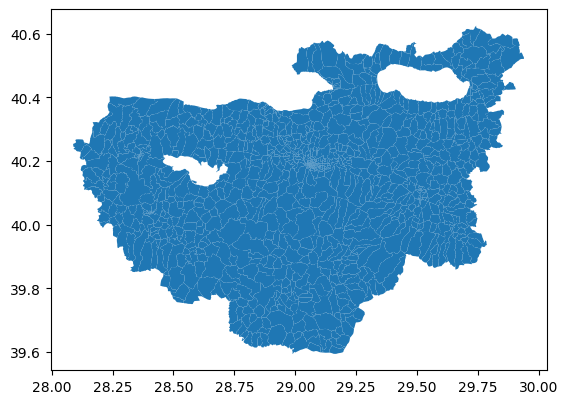

In [5]:
mahalleler.plot()

In [6]:
mahalleler.head()

FID                                  KIMLIK_NO  \
0  Mahalle_Sinirlari.1                                     10-670   
1  Mahalle_Sinirlari.2                                      05-40   
2  Mahalle_Sinirlari.3  01-{89A71CA2-4906-470D-9FB6-CDA01989D9F2}   
3  Mahalle_Sinirlari.4  01-{B79F10FF-79BD-41B8-BF73-39D3916C8DD6}   
4  Mahalle_Sinirlari.5                                     16-003   

              AD    ILCE_ADI  UAVT_KODU  \
0       ORHANİYE   KARACABEY     184059   
1        TİRİLYE     MUDANYA     184223   
2      GÖKÇEÖREN   OSMANGAZİ     183487   
3  GÜNEYBUDAKLAR   OSMANGAZİ     183519   
4        BALABAN  BÜYÜKORHAN     183541   

                                            geometry  
0  POLYGON ((28.65172 40.22363, 28.65184 40.22239...  
1  POLYGON ((28.79313 40.39472, 28.79402 40.39450...  
2  POLYGON ((28.98951 40.18004, 28.99033 40.17736...  
3  POLYGON ((29.18554 40.05728, 29.18533 40.05689...  
4  POLYGON ((28.93700 39.77130, 28.93962 39.76997...

In [7]:
nufus = pd.read_csv("/kaggle/input/dataset-bursa-mahalle/mahalle_nufus.csv")

In [9]:
nufus.tail()

ID MAHALLE_KIMLIK_NO  NUFUS CINSIYET      TARIH
6289  2994            17-028   59.0    KADIN  1/01/2018
6290  1945            17-028   58.0    KADIN  1/01/2017
6291  5092            17-028   47.0    ERKEK  1/01/2019
6292   896            17-028   51.0    ERKEK  1/01/2017
6293  6141            17-028   57.0    KADIN  1/01/2019

In [10]:
mahalleler.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   FID        1049 non-null   object  
 1   KIMLIK_NO  1049 non-null   object  
 2   AD         1046 non-null   object  
 3   ILCE_ADI   1049 non-null   object  
 4   UAVT_KODU  1049 non-null   int64   
 5   geometry   1049 non-null   geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 49.3+ KB


In [17]:
nufus.sort_values(by="MAHALLE_KIMLIK_NO")

ID                          MAHALLE_KIMLIK_NO    NUFUS CINSIYET  \
0      360  01-{032E892E-A7EA-417A-8F10-3B603EF8BD7D}  14905.0    ERKEK   
1     5605  01-{032E892E-A7EA-417A-8F10-3B603EF8BD7D}  15877.0    KADIN   
2     4556  01-{032E892E-A7EA-417A-8F10-3B603EF8BD7D}  16514.0    ERKEK   
3     3507  01-{032E892E-A7EA-417A-8F10-3B603EF8BD7D}  16002.0    ERKEK   
4     1409  01-{032E892E-A7EA-417A-8F10-3B603EF8BD7D}  14111.0    KADIN   
...    ...                                        ...      ...      ...   
6288  4043                                     17-028     47.0    ERKEK   
6289  2994                                     17-028     59.0    KADIN   
6290  1945                                     17-028     58.0    KADIN   
6291  5092                                     17-028     47.0    ERKEK   
6293  6141                                     17-028     57.0    KADIN   

          TARIH  
0     1/01/2017  
1     1/01/2019  
2     1/01/2019  
3     1/01/2018  
4     1/01/2017  
...         ...  
6288  1/01/2018  
6289  1/01/2018  
6290  1/01/2017  
6291  1/01/2019  
6293  1/01/2019  

[6294 rows x 5 columns]

In [20]:
nufus_unisex = nufus.drop(columns=['CINSIYET', 'ID'])

In [25]:
nufus_unisex.head()

MAHALLE_KIMLIK_NO      TARIH    NUFUS
0  01-{032E892E-A7EA-417A-8F10-3B603EF8BD7D}  1/01/2017  29016.0
1  01-{032E892E-A7EA-417A-8F10-3B603EF8BD7D}  1/01/2018  31386.0
2  01-{032E892E-A7EA-417A-8F10-3B603EF8BD7D}  1/01/2019  32391.0
3  01-{0372A115-01B7-4A5F-A570-214A07A8B616}  1/01/2017  22102.0
4  01-{0372A115-01B7-4A5F-A570-214A07A8B616}  1/01/2018  20874.0

In [24]:
nufus_unisex = nufus_unisex.groupby(['MAHALLE_KIMLIK_NO','TARIH']).sum().reset_index()

In [29]:
nufus_son = nufus_unisex.sort_values('TARIH').drop_duplicates('MAHALLE_KIMLIK_NO',keep='last').drop(columns=['TARIH'])

In [31]:
nufus_son.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1049 entries, 2684 to 3146
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MAHALLE_KIMLIK_NO  1049 non-null   object 
 1   NUFUS              1049 non-null   float64
dtypes: float64(1), object(1)
memory usage: 24.6+ KB


In [41]:
mahalleler = mahalleler.merge(nufus_son, left_on='KIMLIK_NO', right_on='MAHALLE_KIMLIK_NO')
mahalleler = mahalleler.drop("MAHALLE_KIMLIK_NO", axis=1)

In [54]:
mahalleler.head()

FID                                  KIMLIK_NO  \
0  Mahalle_Sinirlari.1                                     10-670   
1  Mahalle_Sinirlari.2                                      05-40   
2  Mahalle_Sinirlari.3  01-{89A71CA2-4906-470D-9FB6-CDA01989D9F2}   
3  Mahalle_Sinirlari.4  01-{B79F10FF-79BD-41B8-BF73-39D3916C8DD6}   
4  Mahalle_Sinirlari.5                                     16-003   

              AD    ILCE_ADI  UAVT_KODU  \
0       ORHANİYE   KARACABEY     184059   
1        TİRİLYE     MUDANYA     184223   
2      GÖKÇEÖREN   OSMANGAZİ     183487   
3  GÜNEYBUDAKLAR   OSMANGAZİ     183519   
4        BALABAN  BÜYÜKORHAN     183541   

                                            geometry   NUFUS  yuzolcum  \
0  POLYGON ((28.65172 40.22363, 28.65184 40.22239...   123.0  0.000761   
1  POLYGON ((28.79313 40.39472, 28.79402 40.39450...  1478.0  0.002752   
2  POLYGON ((28.98951 40.18004, 28.99033 40.17736...   207.0  0.001496   
3  POLYGON ((29.18554 40.05728, 29.18533 40.05689...   387.0  0.002296   
4  POLYGON ((28.93700 39.77130, 28.93962 39.76997...   234.0  0.000411   

        yogunluk  
0  161719.248443  
1  537092.342952  
2  138396.208917  
3  168557.936420  
4  569811.448921

In [51]:
mahalleler["yuzolcum"] = mahalleler.area

/tmp/ipykernel_33/2585317353.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mahalleler["yuzolcum"] = mahalleler.area


In [53]:
mahalleler["yogunluk"] = mahalleler["NUFUS"] /  mahalleler["yuzolcum"]

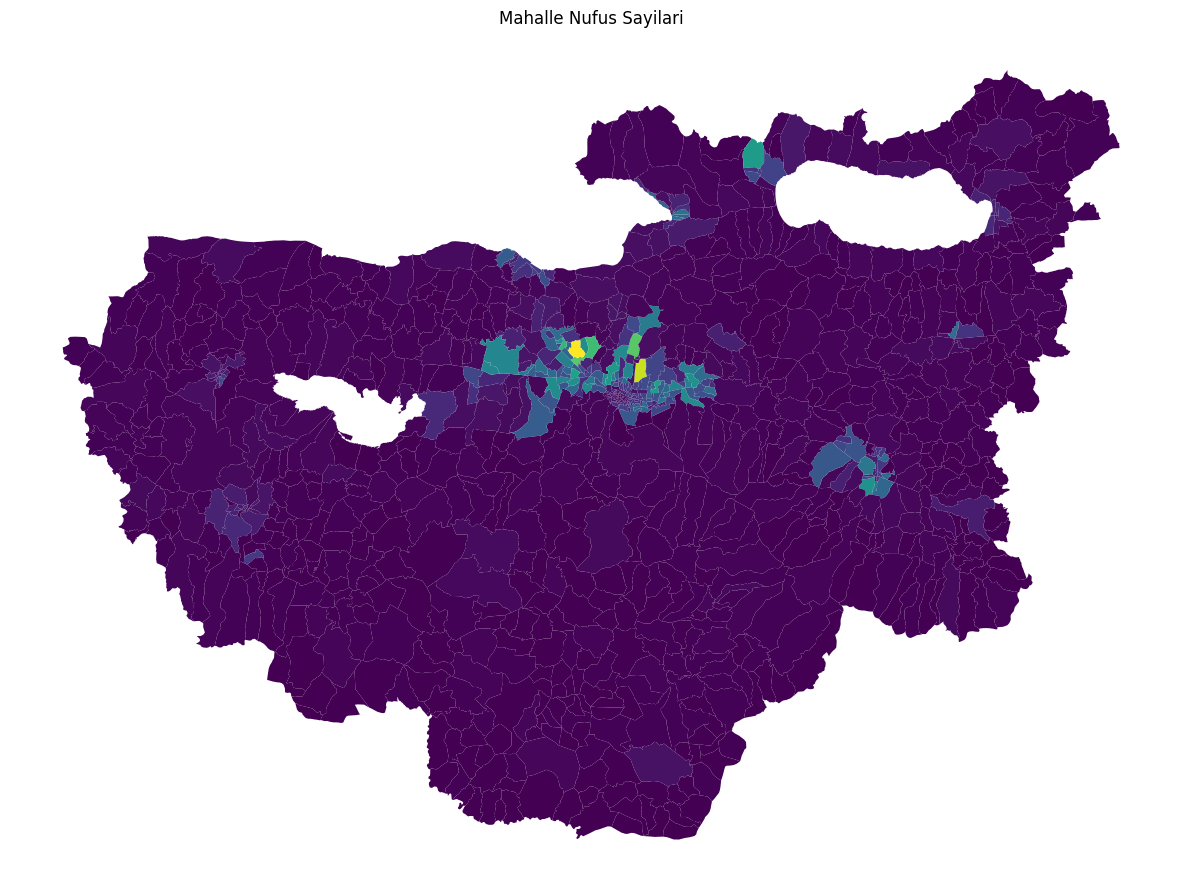

In [49]:
ax = mahalleler.plot(figsize=(15, 15), column='NUFUS')
ax.set_title("Mahalle Nufus Sayilari")
ax.set_axis_off()

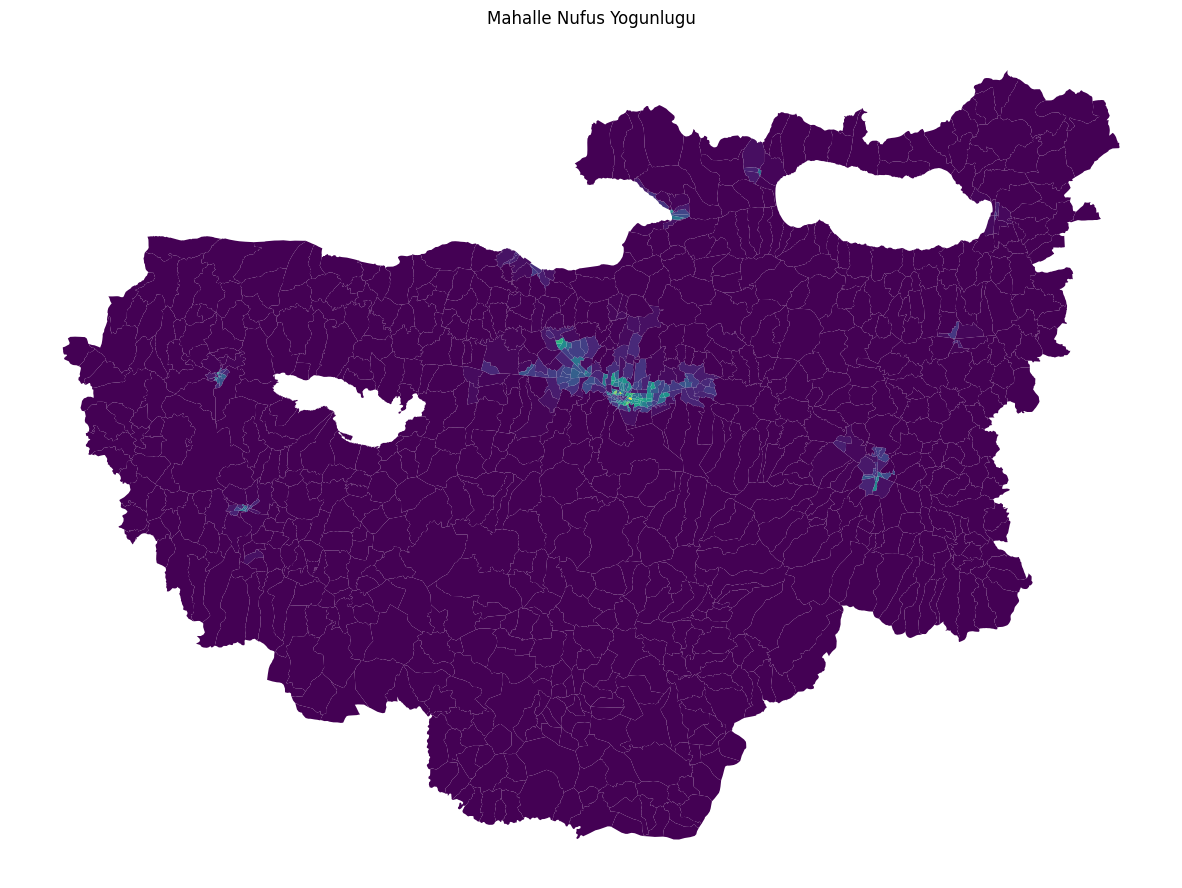

In [55]:
ax = mahalleler.plot(figsize=(15, 15), column='yogunluk')
ax.set_title("Mahalle Nufus Yogunlugu")
ax.set_axis_off()